Aufgabe 32.
Beantworten Sie die folgenden Fragen anhand des Carseats-Datensatzes:

In [2]:
import pandas as pd
from utils import *
from statsmodels.api import OLS, add_constant

In [3]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

In [4]:
df = pd.read_csv('../data/Carseats.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

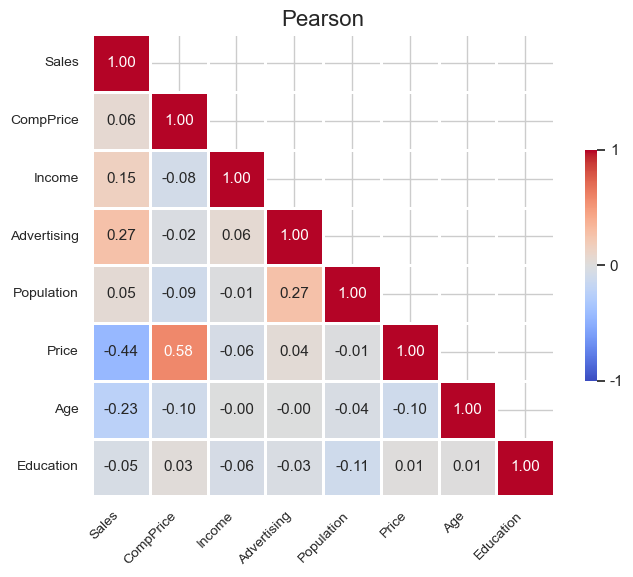

In [13]:
num_corr_heatmap(df.corr(numeric_only=True))

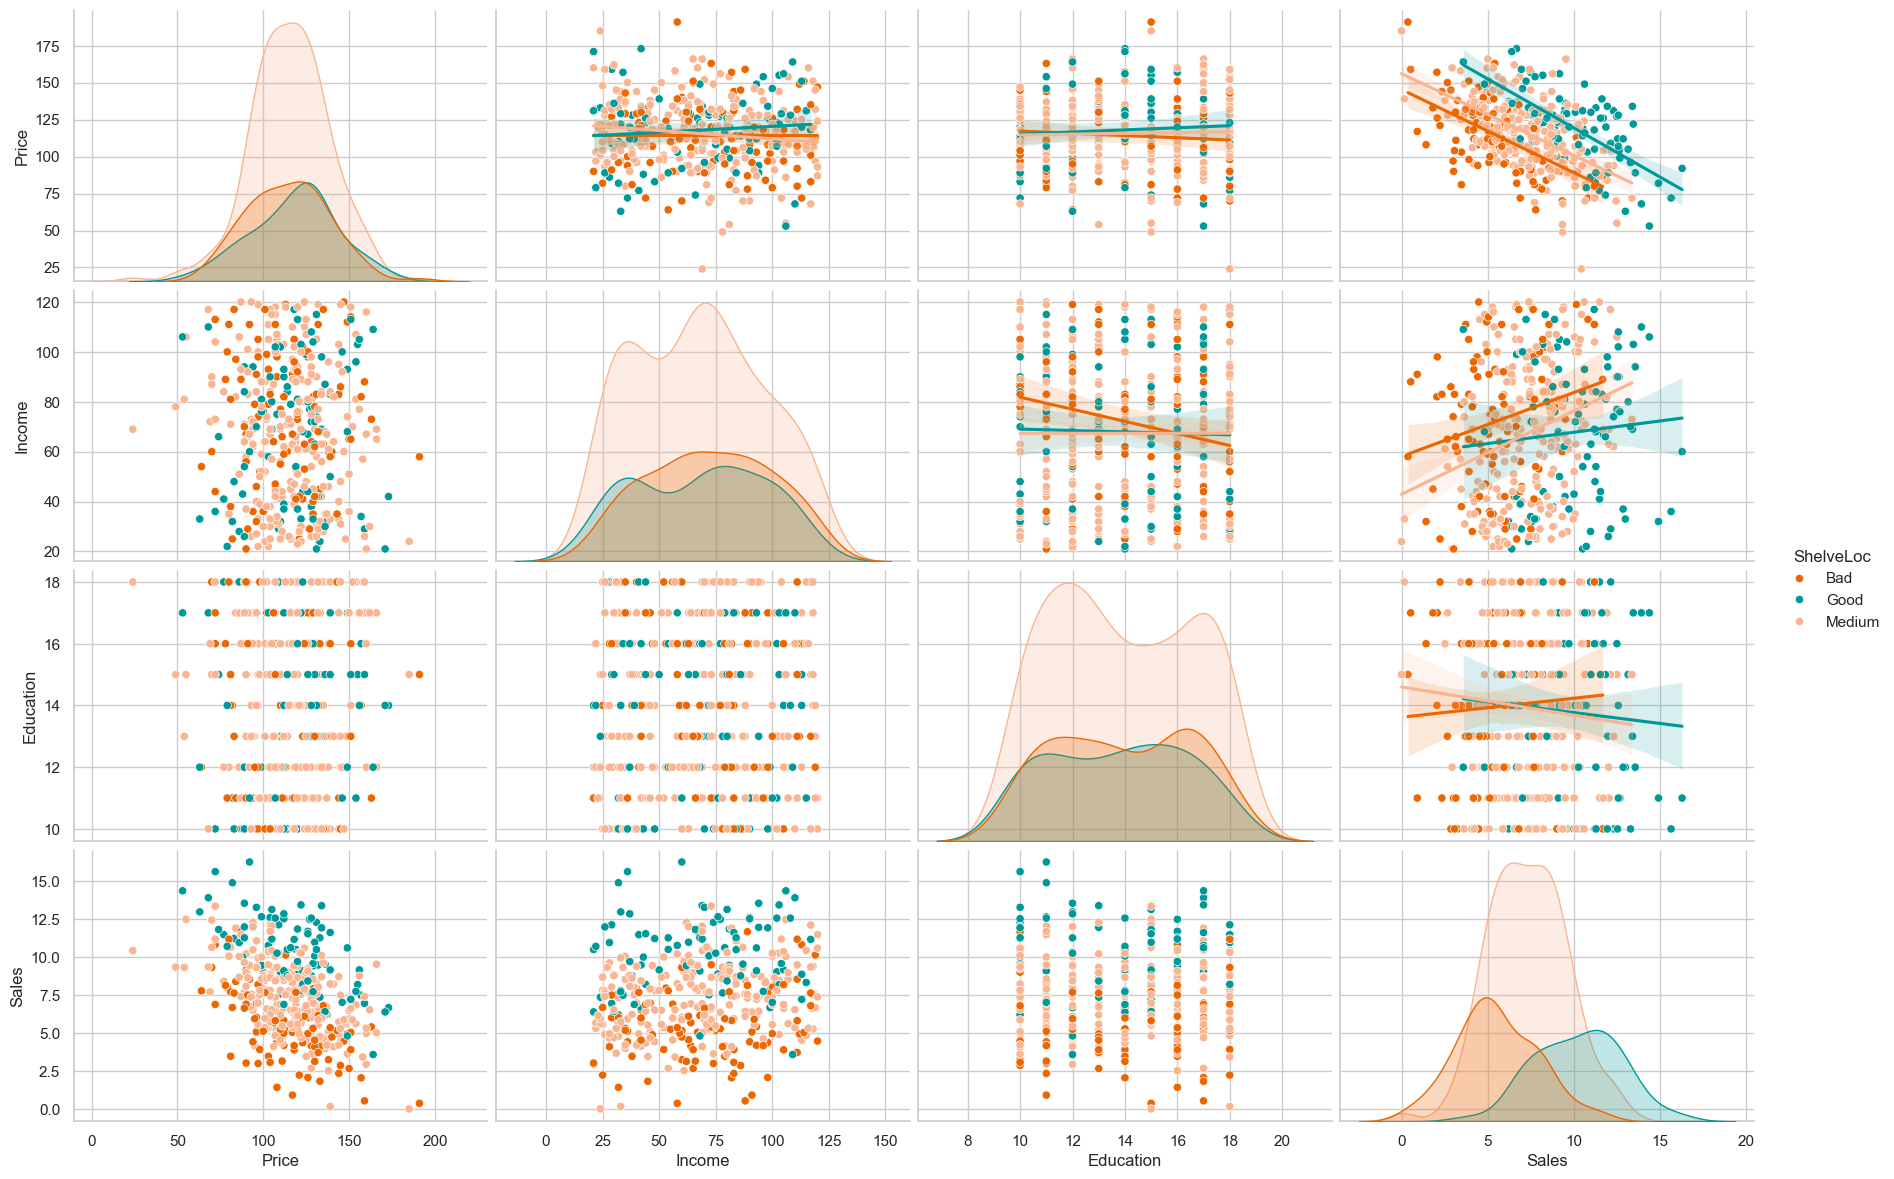

In [21]:
g = sns.pairplot(df[['Price', 'Income', 'Education', 'Sales', 'ShelveLoc']], diag_kind='kde', height=3, aspect=1.5, hue='ShelveLoc');
g.map_upper(sns.regplot, scatter=False);

a) Passen Sie ein multiples lineares Regressionsmodell an, um Sales mithilfe von Price, Income und Education vorherzusagen.

In [6]:
X = df[['Price', 'Income', 'Education']]
y = df['Sales']
X = add_constant(X)
model = OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     36.30
Date:                Thu, 01 May 2025   Prob (F-statistic):           9.64e-21
Time:                        21:34:08   Log-Likelihood:                -933.77
No. Observations:                 400   AIC:                             1876.
Df Residuals:                     396   BIC:                             1892.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2673      0.987     13.443      0.0

b) Schreiben Sie das Modell in Gleichungsform auf.

$$\hat{y} = \hat{\beta_0} + \hat{\beta_1}*Price + \hat{\beta_2}*Income + \hat{\beta_3}*Education$$
$$\hat{y} = 13.2673 - 0.0522 * Price + 0.0126 * Income - 0.0428 * Education$$

c) Interpretieren Sie jeden der Koeffizienten im Modell.

- 13.2673 ist der y-Achsenabschnitt, d.h. der Wert von $\hat{y}$ wenn alle Variablen 0 sind.
- -0.0522 ist der Koeffizient von `Price`. D.h. `Sales` steigt um 0.0522 wenn `Price` um 1 Einheit sinkt, gegeben dass alle andere Variablen gleich bleiben. Der P-Wert ist 0, d.h. der Koeffizient ist signifikant.
- Der Koeffizient von `Income` ist 0.0126, heißt `Sales` steigt um 0.0126 wenn `Income` um 1 Einheit steigt. Der P-Wert ist 0.005, heißt signifikant.
- Der Koeffizient von `Education` ist -0.0428, d.h. `Sales` sinkt um 0.0428 wenn `Education` um 1 Einheit steigt. Aber der P-Wert mit 0.374 ist **nicht** signifikant.

d) Für welche der Prädiktoren können Sie die Nullhypothese H0 : βj = 0 ablehnen?

Für `Education`, da der P-Wert 0.371 > 0.05 ist.

e) Basierend auf Ihrer Antwort zur vorherigen Frage: Passen Sie ein kleineres Modell an, das nur die Prädiktoren verwendet, für die ein Zusammenhang mit der Zielgröße nachweisbar ist.

In [7]:
X = df[['Price', 'Income']]
y = df['Sales']
X = add_constant(X)
model = OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     54.07
Date:                Thu, 01 May 2025   Prob (F-statistic):           1.70e-21
Time:                        21:34:08   Log-Likelihood:                -934.17
No. Observations:                 400   AIC:                             1874.
Df Residuals:                     397   BIC:                             1886.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6615      0.715     17.704      0.0

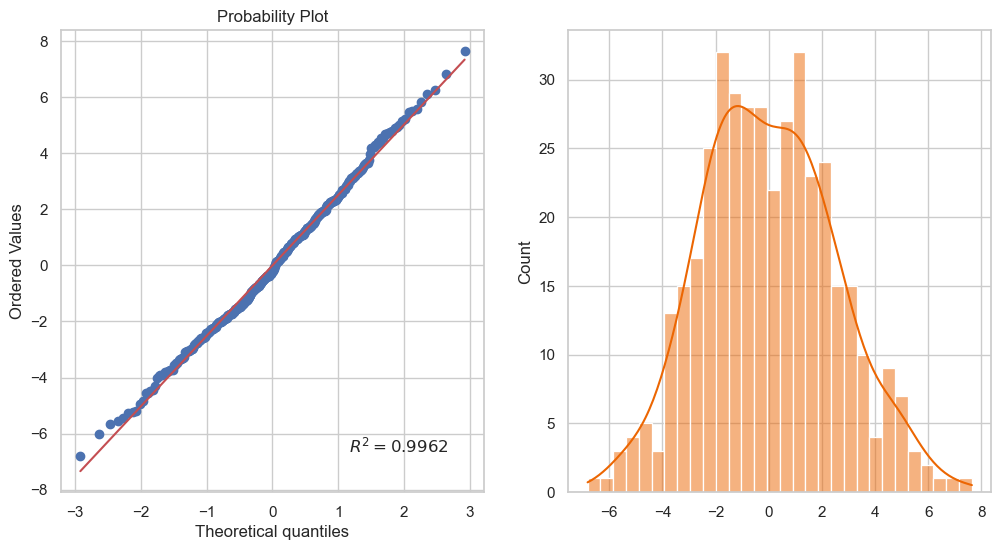

Shapiro-Wilk normality test: p-value = 0.35279548887766005
D'Agostino's K^2 normality test: p-value = 0.25478570849835425
Kolmogorov-Smirnov normality test: p-value = 0.5595671277970375
Anderson-Darling normality test: statistic = 0.5572353819607088, critical value = 0.779


In [8]:
check_normality(results.resid)

f) Bestimmen Sie die 95%-Konfidenzintervalle für die Koeffizienten der Modelle aus (a) und (e) und interpretieren Sie diese kurz.

Konfidenzintervalle aus (a)
- Price: [-0.063: -0.042]
- Income: [0.004: 0.021]
- Education: [-0.137: 0.052]

Konfidenzintervalle aus (e)
- Price: [-0.063: -0.042]
- Income: [0.004: 0.022]

Z.B. das Konfidenzinterval von [-0.063: -0.042] von `Price` heißt wenn wir das gleiche Sampling-Verfahren 100 Mal wiederholen und jedes Mal ein 95%-Konfidenzintervall für $\hat{\beta}_{Price}$ berechnen, dann werden 95 Intervalle den wahren Populationsparameter $\beta_{Price}$ enthalten.

g) Wie gut passen die Modelle aus (a) und (e) die Daten?

Ich würde sagen (e) ist besser als (a), weil wir da eine Variable weniger haben mit fast das gleiche R2, aber die Beide passen nicht gut genug zu den Daten.